In [1]:
from ophyd_async.core import DeviceCollector, StaticPathProvider, AutoIncrementFilenameProvider
from bluesky import RunEngine
from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.plans import count, scan 
# from ophyd.sim import noisy_det as det
from databroker import Broker
import asyncio
#from epics import caget, caput,cainfo
from enum import Enum
from ophyd_async.epics.adcore import NDPluginStatsIO, SingleTriggerDetector
from p99_bluesky.devices.p99 import FilterMotor, SampleAngleStage, p99StageSelections, ThreeAxisStage, Andor2Ad
from p99_bluesky.plans.fast_scan import fast_scan_1d, fast_scan_grid
from p99_bluesky.plans.stxm import stxm_fast,get_velocity_and_step_size, stxm_step
loop = asyncio.get_event_loop()
bec = BestEffortCallback()
RE = RunEngine({})
db = Broker.named('temp')
RE.subscribe(db.insert)

0

In [2]:
andor_data_patt_provider = StaticPathProvider(filename_provider= AutoIncrementFilenameProvider(base_filename="andor2"),
                                              directory_path="/dls/p99/data/2024/cm37284-2/processing/writenData")
from p99_bluesky.plans import tiggerImg,takeImg
from collections import defaultdict
from ophyd_async.core import DetectorTrigger

In [3]:
with DeviceCollector():
        xyz = ThreeAxisStage(prefix="BL99P-MO-STAGE-02:", name="xyz")
        det_andor = Andor2Ad(prefix="BL99P-EA-DET-03:", name= "det_andor",path_provider=andor_data_patt_provider)
        det_andor_sum = SingleTriggerDetector(drv=det_andor.drv, read_uncached=[det_andor.drv.stat_mean])



Transient Scan ID: 8     Time: 2024-09-18 08:46:59
Persistent Unique Scan ID: '3b24d859-92c9-4a43-a1a3-22fa9c568692'
2024-09-18 08:46:59,616 - P99 - INFO - Check xyz-x limits.
2024-09-18 08:46:59,628 - P99 - INFO - Starting 1d fly scan with xyz-x: start position = 2, end position = 5.
2024-09-18 08:47:01,761 - P99 - INFO - flying motor =  xyz-x at speed = 0.3
New stream: 'primary'
+-----------+------------+------------+---------------------------------+-----------------------------+
|   seq_num |       time |      xyz-x | det_andor_sum-drv-array_counter | det_andor_sum-drv-stat_mean |
+-----------+------------+------------+---------------------------------+-----------------------------+
|         1 | 08:47:03.4 |      2.437 |                               1 |                         270 |
|         2 | 08:47:05.1 |      2.975 |                               2 |                         264 |
|         3 | 08:47:06.8 |      3.472 |                               3 |                     

('3b24d859-92c9-4a43-a1a3-22fa9c568692',)

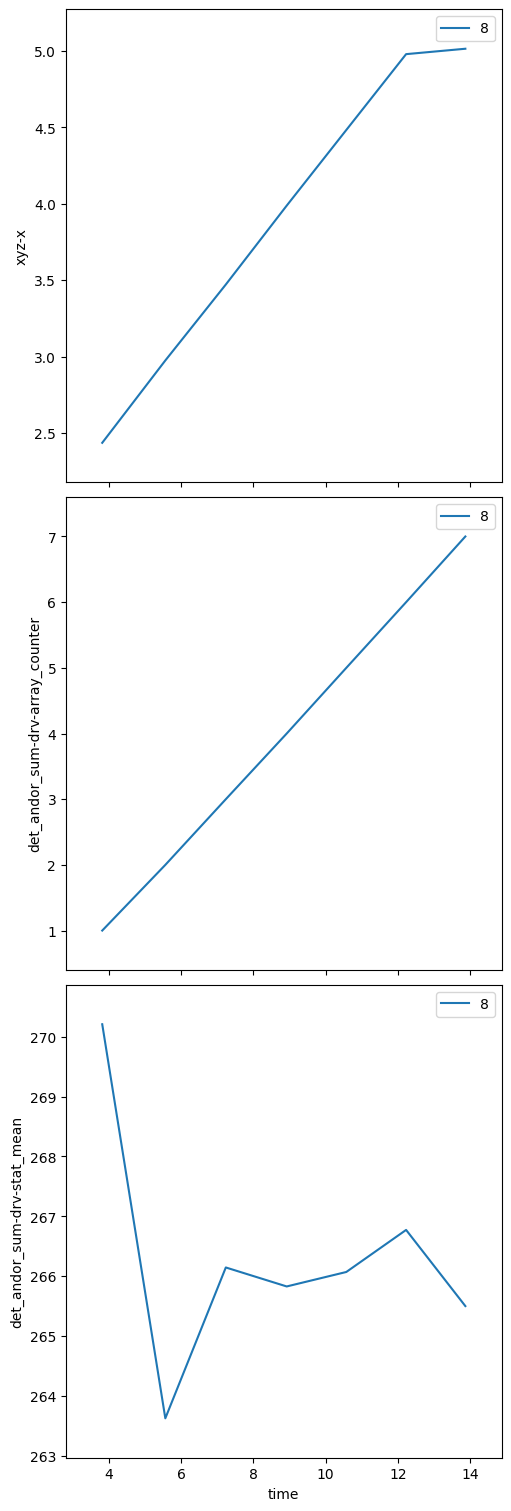

In [13]:
RE(fast_scan_1d(dets=[det_andor_sum],motor = xyz.x,start= 2,end =5,motor_speed=0.3),bec)

2024-09-18 08:47:38,481 - P99 - INFO - Check xyz-y limits.
2024-09-18 08:47:38,485 - P99 - INFO - Check xyz-x limits.
2024-09-18 08:47:38,490 - P99 - INFO - ideal step size = 0.14208066683349452 velocity = 0.7104033341674726 number of data point 1486.111111111111
2024-09-18 08:47:38,491 - P99 - INFO -  step size = 0.14208066683349452, xyz-y: velocity = 0.7104033341674726, number of step = 36.


Transient Scan ID: 9     Time: 2024-09-18 08:47:38
Persistent Unique Scan ID: '41e63c7c-0808-44b9-88c2-4c540cee4e2d'
2024-09-18 08:47:38,616 - P99 - INFO - Check xyz-x limits.
2024-09-18 08:47:38,640 - P99 - INFO - Check xyz-y limits.
2024-09-18 08:47:41,838 - P99 - INFO - Starting 1d fly scan with xyz-y: start position = 5, end position = -1.
2024-09-18 08:47:45,591 - P99 - INFO - flying motor =  xyz-y at speed = 0.7104033341674726
New stream: 'primary'
+-----------+------------+------------+------------+---------------------------------+-----------------------------+
|   seq_num |       time |

('41e63c7c-0808-44b9-88c2-4c540cee4e2d',)

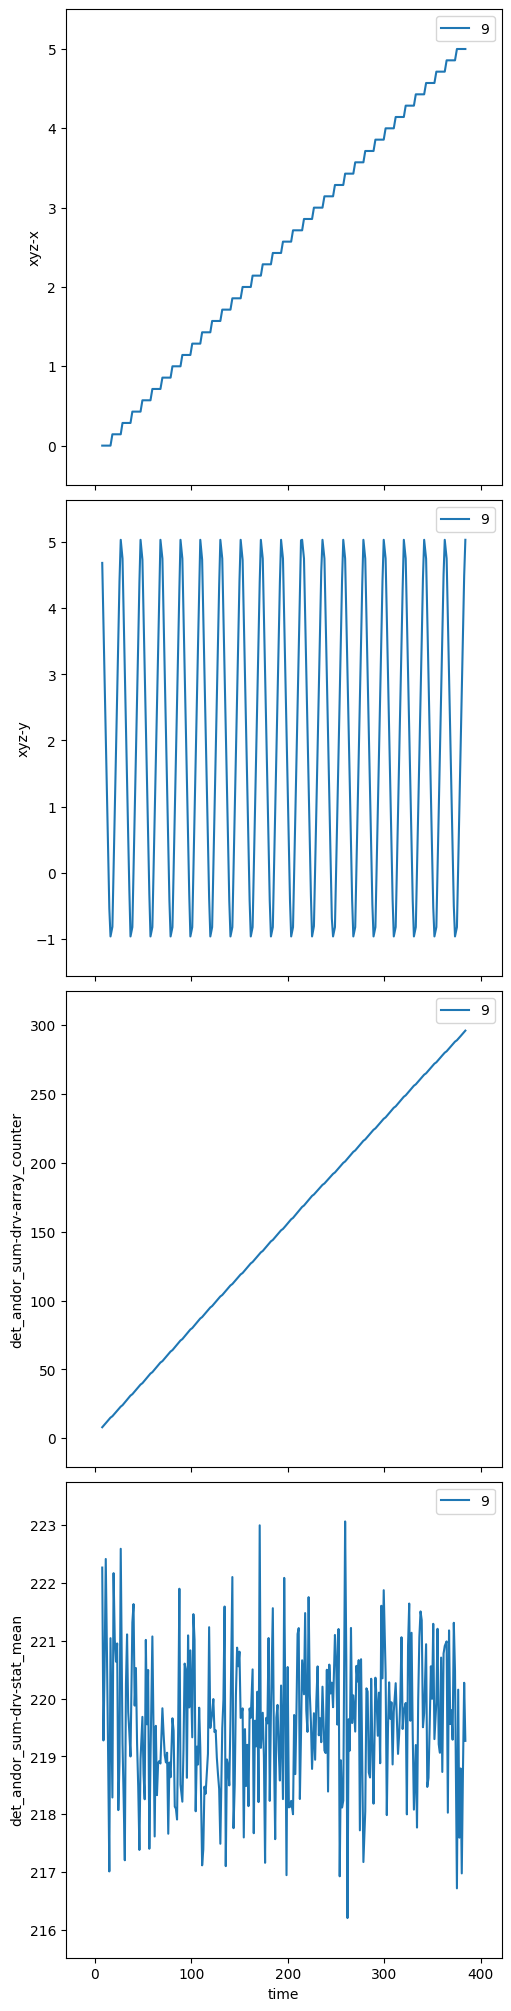

In [14]:
RE(stxm_fast(det=det_andor_sum, count_time = 0.2, step_motor = xyz.x, step_start= 0, step_end=5,
    scan_motor = xyz.y, scan_start = 5, scan_end= -1, plan_time = 300),bec)

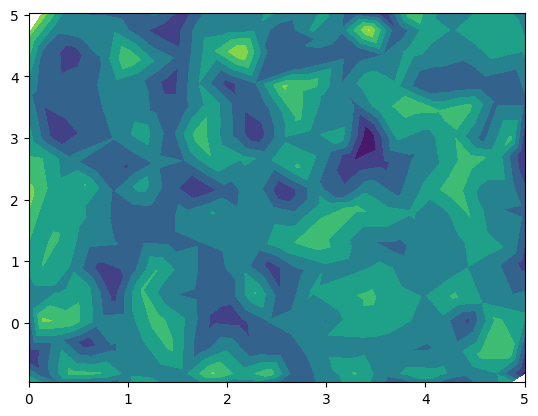

In [15]:
import matplotlib.pyplot as plt
header = db[-1]
data = header.table()
plt.tricontourf(data["xyz-x"],data["xyz-y"],data['det_andor_sum-drv-stat_mean'])

2024-09-17 12:43:51,125 - P99 - INFO - Check xyz-y limits.
2024-09-17 12:43:51,129 - P99 - INFO - Check xyz-x limits.
2024-09-17 12:43:51,132 - P99 - INFO - ideal step size = 0.10046620299347056 velocity = 1.0046620299347055 number of data point 2972.222222222222
2024-09-17 12:43:51,134 - P99 - INFO -  step size = 0.10046620299347056, xyz-y: velocity = 1.0046620299347055, number of step = 50.


Transient Scan ID: 5     Time: 2024-09-17 12:43:51
Persistent Unique Scan ID: '4c7cd932-0ba0-447b-81a5-593f9b8ec57c'
2024-09-17 12:43:51,261 - P99 - INFO - Check xyz-x limits.
2024-09-17 12:43:51,266 - P99 - INFO - Check xyz-y limits.
2024-09-17 12:43:54,479 - P99 - INFO - Starting 1d fly scan with xyz-y: start position = 5, end position = -1.
2024-09-17 12:43:54,816 - P99 - INFO - flying motor =  xyz-y at speed = 1.0046620299347055
New stream: 'primary'
+-----------+------------+---------------------------------+-----------------------------+------------+------------+
|   seq_num |       time |

('4c7cd932-0ba0-447b-81a5-593f9b8ec57c',)

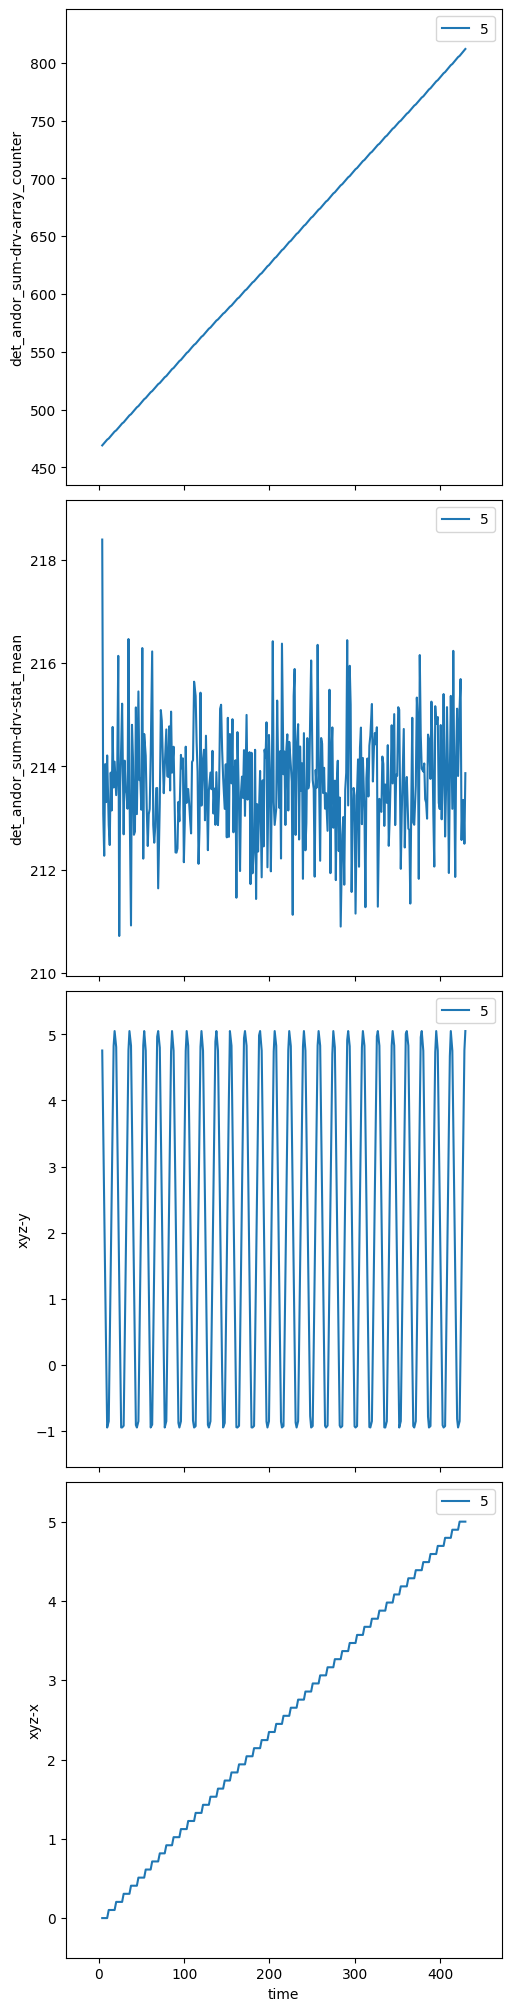

In [15]:
RE(stxm_fast(det=det_andor_sum, count_time = 0.1, step_motor = xyz.x, step_start= 0, step_end=5,
    scan_motor = xyz.y, scan_start = 5, scan_end= -1, plan_time = 300, snake_axes=True),bec)

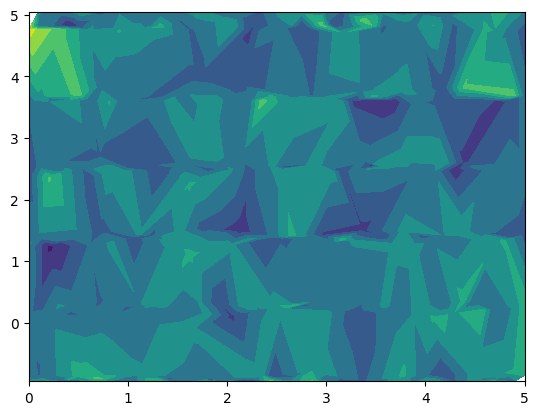

In [16]:
header = db[-1]
data = header.table()
plt.tricontourf(data["xyz-x"],data["xyz-y"],data['det_andor_sum-drv-stat_mean'])

In [ ]:
caget("BL99P-EA-DET-03:HDF5:Capture")

In [ ]:
caput("BL99P-EA-DET-03:HDF5:Capture",0)

In [ ]:
RE(tiggerImg(dets= det_andor,value = 0.1))